# Compositional analysis of the COPD-IAV scRNA dataset using scCoda (pertpy):
- **Developed by**: Christian Eger
- **Talavera-López Lab - Würzburg Institute for Systems Immunology - Faculty of Medicine - Julius Maximilian Universität Würzburg**
- **Created on**: 231214
- **Last modified**: 240108<br>

Created mamba environment in /Users/egerc/miniforge3/envs/pertpy-env
$ mamba create -n pertpy-env python=3.10
$ mamba activate pertpy-env

In [2]:
import warnings

import pandas as pd

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

import scanpy as sc
import numpy as np
#import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import altair as alt
import pertpy as pt
from statannot import add_stat_annotation
from scipy import stats



OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [3]:
sc.logging.print_versions()

-----
anndata     0.10.4
scanpy      1.9.6
-----
PIL                         10.2.0
absl                        NA
adjustText                  0.8
aiohttp                     3.9.1
aiosignal                   1.3.1
altair                      5.2.0
annotated_types             0.6.0
anyio                       NA
appnope                     0.1.3
arrow                       1.3.0
arviz                       0.17.0
asttokens                   NA
async_timeout               4.0.3
attr                        23.2.0
attrs                       23.2.0
backoff                     2.2.1
bs4                         4.12.2
certifi                     2023.11.17
cffi                        1.16.0
chardet                     5.2.0
charset_normalizer          3.3.2
chex                        0.1.7
click                       8.1.7
comm                        0.2.1
contextlib2                 NA
croniter                    NA
custom_inherit              2.4.1
cycler                      0.12.1
cyth

Manual git installation of pertpy necessary due to Apple silicon
$ git clone https://github.com/theislab/pertpy.git
$ cd pertpy
$ pip install .

In [4]:
adata = sc.read_h5ad("Marburg_cell_states_locked_scANVI_ctl230901.raw.h5ad")
print(adata)
#adata object created from the annotated h5ad file.

AnnData object with n_obs × n_vars = 97573 × 27208
    obs: 'sex', 'age', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'condition', 'sample_group', 'IAV_score', 'group', 'Viral_score', 'cell_type', 'cell_states', 'leiden', 'cell_compartment', 'seed_labels', '_scvi_batch', '_scvi_labels', 'C_scANVI'
    var: 'mt', 'ribo'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'


In [5]:
adata.obs

,sex,age,ethnicity,PaCO2,donor,infection,disease,SMK,illumina_stimunr,bd_rhapsody,...,group,Viral_score,cell_type,cell_states,leiden,cell_compartment,seed_labels,_scvi_batch,_scvi_labels,C_scANVI
493638-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,healthy_ctrl,-0.993291,ciliated,OMG+Ciliated,MultiC_0,Ciliated,Ciliated,0,1,Ciliated
816750-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,healthy_ctrl,-1.685051,ciliated,APOD+Ciliated,MultiC_1,Ciliated,Ciliated,0,1,Ciliated
678000-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,healthy_ctrl,-0.506433,ciliated,TCN1+Club,MultiC_3,Club,Club,0,2,Ciliated
247802-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,healthy_ctrl,-1.299193,ciliated,TCN1+Club,MultiC_3,Club,Club,0,2,Club
177433-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,healthy_ctrl,-1.502644,ciliated,TCN1+Club,MultiC_3,Club,Club,0,2,Club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097861-CSE03_IAV-V6,male,66,caucasian,76.8,CSE-03,IAV,COPD,8,21_0507,6,...,copd_iav,-2.114714,mixed,IGFBP6+Basal,Mixed_7,Basal,Basal,0,0,Basal
7239232-CSE03_IAV-V6,male,66,caucasian,76.8,CSE-03,IAV,COPD,8,21_0507,6,...,copd_iav,-3.002878,mixed,KRT16+SupraB,Mixed_9,SupraB,SupraB,0,8,SupraB
5330709-CSE03_IAV-V6,male,66,caucasian,76.8,CSE-03,IAV,COPD,8,21_0507,6,...,copd_iav,-2.085706,mixed,KRT16+SupraB,Mixed_9,SupraB,SupraB,0,8,SupraB
1638545-CSE03_IAV-V6,male,66,caucasian,76.8,CSE-03,IAV,COPD,8,21_0507,6,...,copd_iav,-1.008348,mixed,SERPINE1+Basal,Mixed_3,Basal,Basal,0,0,Basal


In [6]:
#adata.obs["infectionANDdisease"] = adata.obs["infection"].str.cat(adata.obs["disease"], sep = "&")
adata.obs
adata.obs["group"].cat.categories
#creating a new obs based on adding obs infection and obs disease --> CTRL&COPD, IAV&COPD, CTRL&healthy, IAV&healthy

Index(['healthy_ctrl', 'healthy_iav', 'copd_ctrl', 'copd_iav'], dtype='object')

In [7]:
adata.obs["cell_compartment"]
#adata.obs["cell_compartment"].cat.categories


493638-ST07_CSE_CTRL-V1    Ciliated
816750-ST07_CSE_CTRL-V1    Ciliated
678000-ST07_CSE_CTRL-V1        Club
247802-ST07_CSE_CTRL-V1        Club
177433-ST07_CSE_CTRL-V1        Club
                             ...   
2097861-CSE03_IAV-V6          Basal
7239232-CSE03_IAV-V6         SupraB
5330709-CSE03_IAV-V6         SupraB
1638545-CSE03_IAV-V6          Basal
163246-CSE03_IAV-V6           Basal
Name: cell_compartment, Length: 97573, dtype: category
Categories (10, object): ['Basal', 'Ciliated', 'Club', 'Deuterosomal', ..., 'Ionocyte', 'Secretory', 'SupraB', 'Unknown']

In [8]:
adata.obs["cell_states"].cat.categories

Index(['APOD+Ciliated', 'IGFBP6+Basal', 'SERPINE1+Basal', 'SERPINE2+Basal',
       'CCDC3+Basal1', 'DHRS9+Club', 'FB-like_Basal', 'IGFBP+Basal',
       'ImmuneClub', 'Ionocyte', 'KRT14+AQP1+Secretory', 'KRT14+Goblet',
       'KRT17+Goblet', 'MHCII+Club', 'MKI67+pBasal', 'MUC5B+Goblet',
       'NOTCH+Basal2', 'NOTCH3+SupraB', 'OASiav_Ciliated', 'OMG+Ciliated',
       'RARRES1+lip_Goblet', 'S100A2+Basal', 'SCGB1+KRT5-FOXA1+iav_Club',
       'SCGB1A1+Deutero', 'SCGB1A1+Goblet', 'KRT16+SupraB', 'TCN1+Club',
       'TNC+Basal', 'iavAPC_Epi', 'iav-lip_Club', 'iav_Goblet', 'ifn_Basal',
       'ifn_Goblet', 'mixed_Goblet1', 'mixed_Goblet2', 'p53_Ciliated'],
      dtype='object')

create notebook for every compartment and compare across cell states
visualization improvement
reference to ctrl healthy

In [9]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="cell_compartment",
    sample_identifier="batch",
    covariate_obs=["infection", "disease", "group"],
)
sccoda_data

MuData object with n_obs × n_vars = 97597 × 27218
  2 modalities
    rna:	97573 x 27208
      obs:	'sex', 'age', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'condition', 'sample_group', 'IAV_score', 'group', 'Viral_score', 'cell_type', 'cell_states', 'leiden', 'cell_compartment', 'seed_labels', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'scCODA_sample_id'
      var:	'mt', 'ribo'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
    coda:	24 x 10
      obs:	'infection', 'disease', 'group', 'batch'
      var:	'n_cells'

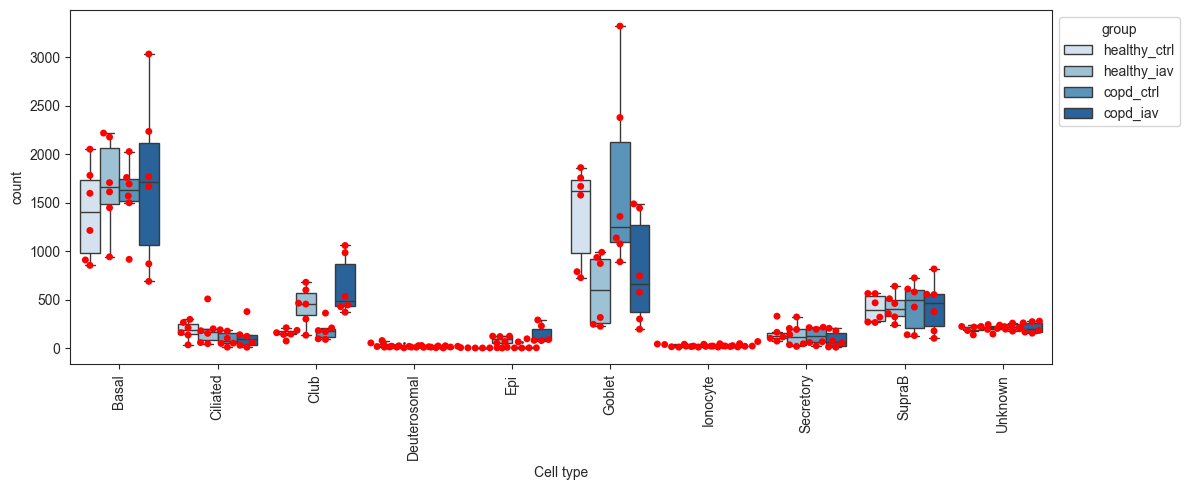

In [10]:
pt.pl.coda.boxplots(
    sccoda_data,
    modality_key="coda",
    feature_name="group",
    y_scale="count",
    figsize=(12, 5),
    add_dots=True,
    args_swarmplot={"palette": ["red"]},
)
plt.show()

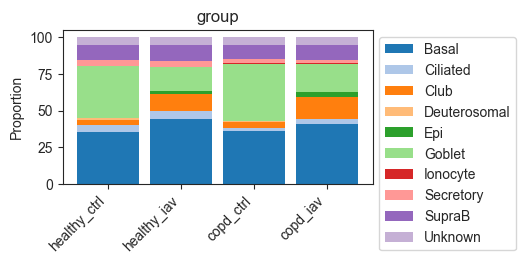

In [11]:
pt.pl.coda.stacked_barplot(
    sccoda_data, modality_key="coda", feature_name="group", figsize=(4, 2)
)
plt.show()

## 11.12.23

Function sccoda.run_nuts() broken at the moment
https://github.com/theislab/pertpy/issues/454
Downgrading Jax didn't solve the issue for me.

--> solution: completely new environment, install jax=0.4.20 prior to installing pertpy

In [12]:
sccoda_data = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda",
    formula="infection",
    reference_cell_type="automatic",
)
sccoda_model.run_nuts(sccoda_data, modality_key="coda", rng_key=1234)

Automatic reference selection! Reference cell type set to Unknown

Zero counts encountered in data! Added a pseudocount of 0.5.

sample: 100%|██████████| 11000/11000 [00:43<00:00, 251.84it/s, 255 steps of size 2.37e-02. acc. prob=0.79]


In [13]:
sccoda_data

MuData object with n_obs × n_vars = 97597 × 27218
  2 modalities
    rna:	97573 x 27208
      obs:	'sex', 'age', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'condition', 'sample_group', 'IAV_score', 'group', 'Viral_score', 'cell_type', 'cell_states', 'leiden', 'cell_compartment', 'seed_labels', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'scCODA_sample_id'
      var:	'mt', 'ribo'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
    coda:	24 x 10
      obs:	'infection', 'disease', 'group', 'batch'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
      varm:	'intercept_df', 'effect_df_infection[T.IAV]'

In [14]:
sccoda_model.set_fdr(sccoda_data, 0.2)

In [15]:
sccoda_model.credible_effects(sccoda_data, modality_key="coda")

Covariate         Cell Type   
infection[T.IAV]  Basal           False
                  Ciliated        False
                  Club             True
                  Deuterosomal    False
                  Epi              True
                  Goblet           True
                  Ionocyte        False
                  Secretory        True
                  SupraB          False
                  Unknown         False
Name: Final Parameter, dtype: bool

In [16]:
sccoda_data["coda"].varm["effect_df_infection[T.IAV]"]

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
Basal,0.000000,-0.320,0.237,0.074,0.2311,1690.139869,0.232494
Ciliated,0.000000,-0.582,0.388,0.149,0.3094,156.110887,0.232494
Club,0.817029,0.390,1.269,0.242,0.9906,528.263877,1.411218
Deuterosomal,0.000000,-0.891,0.334,0.239,0.4014,54.465451,0.232494
Epi,1.250430,0.580,1.984,0.379,0.9938,109.727071,2.036483
Goblet,-0.976361,-1.294,-0.650,0.166,1.0000,624.034709,-1.176096
Ionocyte,0.000000,-0.629,0.533,0.180,0.3364,64.881762,0.232494
Secretory,-0.399386,-0.950,0.103,0.298,0.5395,104.918124,-0.343698
SupraB,0.000000,-0.478,0.241,0.112,0.2912,459.237069,0.232494


<Axes: xlabel='Cell Type', ylabel='log2-fold change'>

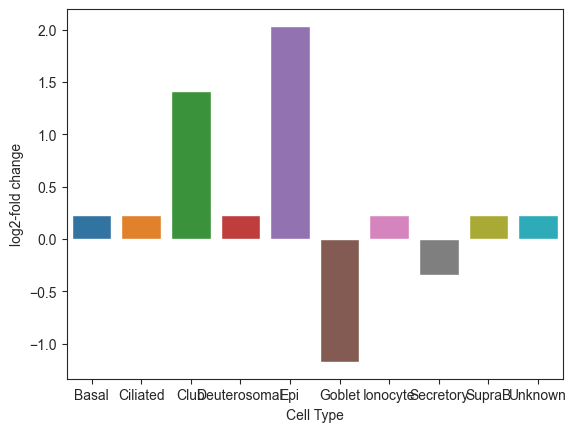

In [17]:
sns.barplot(data=sccoda_data["coda"].varm["effect_df_infection[T.IAV]"], x="Cell Type", y="log2-fold change", hue="Cell Type")

In [56]:
pt.pl.coda.effects_barplot(sccoda_data, "coda", "disease")
plt.show()

ValueError: Number of columns must be a positive integer, not 0

<Figure size 0x300 with 0 Axes>